## feature selection

**retrieval the important features, selecting an important feature is very important step before going to ML**

- Droping the constant features(Regression and Classification)

- information gain(Classification)

- P-value(Regression)

- VIF(Regression)

- Forward selection and Backward selection(Regression and Classification)

- Correalation with target column(Regression and Classification)

**Method-1**

**Droping the constant features**

- if the features or variables having zero variance

- variance indicates how data distribution happens

- Constant features has less variance

- by keeping some threshold we can remove those features

-  the feature values through out the data is same

- you can decide manually what is your desired  variance in order to keep the feature

In [2]:
import pandas as pd
dict1={'A':[100,200,300,400],
       'B':[1,2,3,4],
       'C':[10,20,30,40],
       'D':[10,10,10,10]}

df=pd.DataFrame(dict1)
df

,A,B,C,D
0,100,1,10,10
1,200,2,20,10
2,300,3,30,10
3,400,4,40,10


In [3]:
from sklearn.feature_selection import VarianceThreshold
vt=VarianceThreshold(threshold=0)
# Variance Threshold value
# we want to drop the feature  based on threshold
# we are finding the variance so only fit
# transform is nnot required
vt.fit(df)

VarianceThreshold(threshold=0)

In [3]:
dir(vt)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_support_mask',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sklearn_auto_wrap_output_keys',
 '_transform',
 '_validate_data',
 '_validate_params',
 'feature_names_in_',
 'fit',
 'fit_tran

In [30]:
print(vt.feature_names_in_)

['A' 'B' 'C' 'D']


In [28]:
print(vt.get_feature_names_out())

['A' 'B' 'C']


In [27]:
print(vt.get_params())

{'threshold': 0}


In [26]:
print(vt.get_support())

[ True  True  True False]


In [25]:
print(vt.n_features_in_)

4


In [24]:
print(vt.threshold)

0


In [23]:
print(vt.variances_)

[300.     1.25  30.     0.  ]


In [22]:
new_df=df[vt.get_feature_names_out()]
new_df

,A,B,C
0,100,1,10
1,200,2,20
2,300,3,30
3,400,4,40


In [52]:
df=pd.read_csv(r'C:\Users\sravani9\OneDrive\Documents\Naresh IT\Python sessions\Data_files\winequality_red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [53]:
df=pd.read_csv(r'C:\Users\sravani9\OneDrive\Documents\Naresh IT\Python sessions\Data_files\winequality_red.csv')
from sklearn.feature_selection import VarianceThreshold


**Method-2 information gain**

mutual into classify

- it is a value estimating how much relationship how much information about target column

- we dont want relation between input features

- we want relation between input and output feature

- 0 means both variables are independent

- here we use entropy or KNN method based on joint probability

In [11]:
import pandas as pd
data=pd.read_csv(r'C:\Users\sravani9\OneDrive\Documents\Naresh IT\Python sessions\Data_files\winequality_red.csv')
X=data.drop('quality',axis=1)  # x is dataframe
y=data['quality'] # y is series type

In [12]:
len(data.columns),len(X.columns)

(12, 11)

In [13]:
X.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [14]:
from sklearn.feature_selection import mutual_info_classif
MI=mutual_info_classif(X,y)
MI

array([0.03812097, 0.13369761, 0.04584302, 0.03406756, 0.03296607,
       0.03323102, 0.07554371, 0.07819492, 0.01027228, 0.0955188 ,
       0.18640181])

In [15]:
d=pd.DataFrame(MI,
               index=X.columns,
               columns=['MI'])
sorted_data=d.sort_values(by='MI',ascending=False)
sorted_data

,MI
alcohol,0.186402
volatile acidity,0.133698
sulphates,0.095519
density,0.078195
total sulfur dioxide,0.075544
citric acid,0.045843
fixed acidity,0.038121
residual sugar,0.034068
free sulfur dioxide,0.033231
chlorides,0.032966


In [16]:
con=sorted_data['MI']>0.10
cols=sorted_data[con].index
cols

Index(['alcohol', 'volatile acidity'], dtype='object')

**how to get top 5 columns manually**

In [17]:
d=pd.DataFrame(MI,
               columns=['Information gain'],
               index=X.columns)
sorted_d=d.sort_values('Information gain', ascending=False)

data[sorted_d.index[:5]]

,alcohol,volatile acidity,sulphates,density,total sulfur dioxide
0,9.4,0.700,0.56,0.99780,34.0
1,9.8,0.880,0.68,0.99680,67.0
2,9.8,0.760,0.65,0.99700,54.0
3,9.8,0.280,0.58,0.99800,60.0
4,9.4,0.700,0.56,0.99780,34.0
...,...,...,...,...,...
1594,10.5,0.600,0.58,0.99490,44.0
1595,11.2,0.550,0.76,0.99512,51.0
1596,11.0,0.510,0.75,0.99574,40.0
1597,10.2,0.645,0.71,0.99547,44.0


**selectkbest**

In [69]:
data=pd.read_csv(r'C:\Users\sravani9\OneDrive\Documents\Naresh IT\Python sessions\Data_files\winequality_red.csv')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


- Any feature apply MutualInfoClassify

- If we want to find cat-cat relation then use scoring function as : **chi2**

- If we want to find num-cat relation then use scoring function as : **ANOVA f-test**

In [4]:
from sklearn.feature_selection import SelectKBest,mutual_info_classif,chi2,f_classif
import pandas as pd
data=pd.read_csv(r'C:\Users\sravani9\OneDrive\Documents\Naresh IT\Python sessions\Data_files\winequality_red.csv')

# seperate input and target features
X=data.drop('quality',axis=1)
y=data['quality']

top_5=SelectKBest(mutual_info_classif,k=5)
val=top_5.fit(X,y)

# SelectKBest(score_func=chi2,k=5)
# SelectKBest(score_func=f_classif,k=5)

In [6]:
#MI ===== DataFrame  pd.DataFrame(MI)
#MI ==== Series      pd.Series(MI)

In [18]:
val=pd.Series(MI)
val.index=X.columns
val

fixed acidity           0.038121
volatile acidity        0.133698
citric acid             0.045843
residual sugar          0.034068
chlorides               0.032966
free sulfur dioxide     0.033231
total sulfur dioxide    0.075544
density                 0.078195
pH                      0.010272
sulphates               0.095519
alcohol                 0.186402
dtype: float64

In [19]:
# Two methods almost enough
# Constan features ==== you need to remove
# Mutual information
val=pd.Series(MI)    # index with series
val.index=X.columns  # column with series
val

fixed acidity           0.038121
volatile acidity        0.133698
citric acid             0.045843
residual sugar          0.034068
chlorides               0.032966
free sulfur dioxide     0.033231
total sulfur dioxide    0.075544
density                 0.078195
pH                      0.010272
sulphates               0.095519
alcohol                 0.186402
dtype: float64

In [20]:
val.sort_values(ascending=True)

pH                      0.010272
chlorides               0.032966
free sulfur dioxide     0.033231
residual sugar          0.034068
fixed acidity           0.038121
citric acid             0.045843
total sulfur dioxide    0.075544
density                 0.078195
sulphates               0.095519
volatile acidity        0.133698
alcohol                 0.186402
dtype: float64

<Axes: >

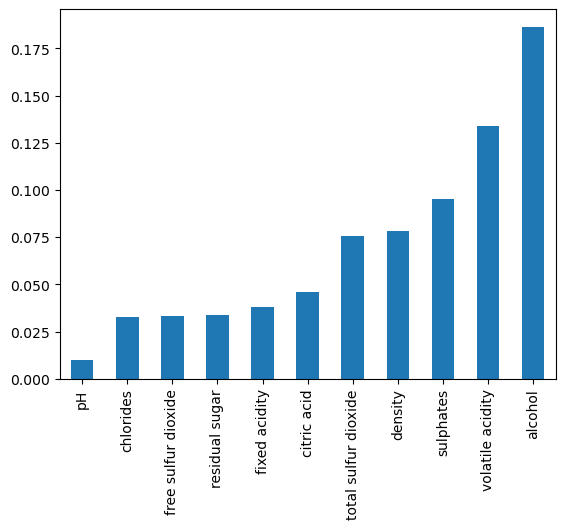

In [21]:
series_mi=val.sort_values(ascending=True)
series_mi.plot(kind='bar')

1.we read the data

2.we sepearted X and y

3.we read the mutual_info_classify

4.we pass the X,y inside the mutual_info_classify

5.we got mutual information values between input columns and output

6.we have total 11 incput columns so that we got 11 values

7.We represented with data frame. we selected top5

8.we represented with series we plot bar chart

is this suitable for both classification and regression sir mutual info

at which step will do these feature selection

why we are splitting : x and y

python code will allow X and y sepeartely

thats why we are splitting

ones we extract the important fetaures , those features used to develop a model



**SelectKBest**

In [22]:
data=pd.read_csv(r'C:\Users\sravani9\OneDrive\Documents\Naresh IT\Python sessions\Data_files\winequality_red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


- SelectKBest will select the top k columns based on Mutual Information with target columns

- It will take two values

   - mutual_info_classif

   - How many top columns we want to select k= hyper parameter

- Any feature apply MutualInfoClassify

- If we want to find cat-cat relation then use scoring function as : chi2

- If we want to find num-cat relation then use scoring function as: ANOVA f-test

In [25]:
from sklearn.feature_selection import SelectKBest,mutual_info_classif,chi2,f_classif
import pandas as pd

# Read the data
data=pd.read_csv(r"C:\Users\sravani9\OneDrive\Documents\Naresh IT\Python sessions\Data_files\winequality_red.csv")

#Sepearte input and target features
X=data.drop('quality',axis=1) 
y=data['quality']


top_5=SelectKBest(mutual_info_classif,k=5)
val=top_5.fit(X,y)

#SelectKBest(score_func=chi2,k=5)
#SelectKBest(score_func=f_classif,k=5)

In [26]:
val.get_support()

array([False,  True, False, False, False, False,  True,  True, False,
        True,  True])

In [27]:
val.get_feature_names_out()

array(['volatile acidity', 'total sulfur dioxide', 'density', 'sulphates',
       'alcohol'], dtype=object)

In [28]:
val.get_params() #

{'k': 5,
 'score_func': <function sklearn.feature_selection._mutual_info.mutual_info_classif(X, y, *, discrete_features='auto', n_neighbors=3, copy=True, random_state=None, n_jobs=None)>}

In [29]:
val.scores_

array([0.04139471, 0.12074274, 0.05892253, 0.01484145, 0.05254787,
       0.0139052 , 0.07440167, 0.08264515, 0.00632866, 0.10437055,
       0.18839796])

**Method-3**

**p-value**

In [31]:
############## All together ##############
#Step-1: Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Step-2:  Read the data
df = pd.read_csv("C:\\Users\\sravani9\\OneDrive\\Documents\\Naresh IT\\Python sessions\\Data_files\\winequality_red.csv")
df.head()

# Step-3(Optional): If you are seeing any duplicates
#         or data has empty rows when you read it display as NuLL  or NaN
#         if you are seeing this check it is really a missing values  
#         or  data has empty rows (alternative rows)
df.dropna(inplace=True)
df.reset_index(inplace=True)

##################### EDA ##################
#Numerical data  shoudl be ready  before go to the step-4 
############################################# 

# Step-4: Divide into X and y
X=df.drop('quality',axis=1)
y=df['quality']

# Step-5: Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,  # Input data
                                                  y,  # output data
                                                  random_state=1234, # it select random samples
                                                  test_size=0.30)


from statsmodels.api import OLS
OLS(y_train,X_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                quality   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              6888.
Date:                Sat, 17 May 2025   Prob (F-statistic):                        0.00
Time:                        16:59:07   Log-Likelihood:                         -1114.5
No. Observations:                1119   AIC:                                      2253.
Df Residuals:                    1107   BIC:                                      2313.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
index                -5.673e-05   4.81e-05     -1.180      0.238      -0.000    3.76e-05
fixed acidity            0.0079      0.021      0.383      0.701      -0.033       0.048
volatile acidity        -1.1899      0.142     -8.356      0.000      -1.469      -0.910
citric acid             -0.2576      0.178     -1.445      0.149      -0.607       0.092
residual sugar          -0.0027      0.014     -0.189      0.850      -0.031       0.025
chlorides               -1.5908      0.495     -3.217      0.001      -2.561      -0.620
free sulfur dioxide      0.0074      0.003      2.731      0.006       0.002       0.013
total sulfur dioxide    -0.0043      0.001     -4.413      0.000      -0.006      -0.002
density                  4.4695      0.780      5.727      0.000       2.938       6.001
pH                      -0.5425      0.198     -2.735      0.006      -0.932      -0.153
sulphates                0.9274      0.133      6.965      0.000       0.666       1.189
alcohol                  0.3140      0.022     14.165      0.000       0.270       0.357
==============================================================================
Omnibus:                       13.424   Durbin-Watson:                   2.103
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.573
Skew:                          -0.167   Prob(JB):                     0.000252
Kurtosis:                       3.494   Cond. No.                     3.85e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.85e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Based on alpha= 0.05

- We will reject 3 columns: Fixed acidity,Citric acid, Residual sugar

- Again we need to build the model by using other features

**Method-4**

**VIF**

In [32]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Sample data
data = {
    'X1': np.random.randn(100),
    'X2': np.random.randn(100),
    'X3': np.random.randn(100)
}

df = pd.DataFrame(data)

# Adding a multicollinear variable
df['X4'] = 2*df['X1'] + 3*df['X2'] + np.random.normal(0, 0.1, 100)

# Fit a multiple regression model
X = df[['X1', 'X2', 'X3', 'X4']]
y = np.random.randn(100)
model = sm.OLS(y, sm.add_constant(X)).fit()

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)


  feature          VIF
0      X1   435.913693
1      X2   963.597601
2      X3     1.012875
3      X4  1357.419282


In [33]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.8891
Date:                Sat, 17 May 2025   Prob (F-statistic):              0.474
Time:                        17:00:30   Log-Likelihood:                -131.15
No. Observations:                 100   AIC:                             272.3
Df Residuals:                      95   BIC:                             285.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1685      0.094      1.799      0.075      -0.017       0.354
X1            -1.9869      1.949     -1.019      0.311      -5.856       1.882
X2            -2.8208      2.934     -0.961      0.339      -8.646       3.004
X3            -0.1241      0.092     -1.349      0.180      -0.307       0.058
X4             0.9523      0.979      0.973      0.333      -0.991       2.896
==============================================================================
Omnibus:                        0.260   Durbin-Watson:                   1.781
Prob(Omnibus):                  0.878   Jarque-Bera (JB):                0.239
Skew:                          -0.113   Prob(JB):                        0.887
Kurtosis:                       2.921   Cond. No.                         143.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Step-2:  Read the data
df = pd.read_csv("C:\\Users\\sravani9\\OneDrive\\Documents\\Naresh IT\\Python sessions\\Data_files\\winequality_red.csv")
df.head()

# Step-3(Optional): If you are seeing any duplicates
#         or data has empty rows when you read it display as NuLL  or NaN
#         if you are seeing this check it is really a missing values  
#         or  data has empty rows (alternative rows)
df.dropna(inplace=True)
df.reset_index(inplace=True)

##################### EDA ##################
#Numerical data  shoudl be ready  before go to the step-4 
############################################# 

# Step-4: Divide into X and y
X=df.drop('quality',axis=1)
y=df['quality']

In [36]:
# Calculate VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

                 feature          VIF
0                  index     5.054246
1          fixed acidity    80.338968
2       volatile acidity    17.065205
3            citric acid     9.197695
4         residual sugar     4.663513
5              chlorides     6.573395
6    free sulfur dioxide     6.781651
7   total sulfur dioxide     6.916574
8                density  1551.937829
9                     pH  1109.622836
10             sulphates    21.844623
11               alcohol   130.707581
